In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ROCModule as roc 

num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# take the provided test set in a dataframe
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
print(x_test[0])

[39. 40. 39. ... 43. 45. 45.]


In [3]:
# This method will take a dataset and add a random amount to it between two limits. For the research we chose a random amount between 10 and 15
def makeContrastedDataset(dataset, upperLimitOfContrast, lowerLimitOfContrast):
    manipulationDataset = []
    for val in dataset:
        index = []
        for a in val:
            b = random.randint(lowerLimitOfContrast, upperLimitOfContrast)
            newVal = b + a
            if newVal > 255:
                newVal = 255
            index.append(newVal)
        manipulationDataset.append(index)
    return manipulationDataset

In [4]:
# Here the 'day' dataset is created
brightx_test = makeContrastedDataset(x_test, 15, 10)

In [5]:
# the same training datasets from all other models was used here again
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [6]:
# The test class values
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [7]:
# Here we reshape the training class values so we can append them to the test data. Then we randomise and split these data sets back into training and testing data
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(brightx_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

brightx_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
brightx_test  = brightx_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1
x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

brightx_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = brightx_test).reshape((-1,num_pixels*num_pixels))


In [8]:
# Create 10 output bins (one for every class)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [9]:
# define a model with enough layers that a comperable one with dropout included can be built
model2 = Sequential()

In [10]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model2.add(Dense(512, activation = 'relu'))
# Layer 3
model2.add(Dense(512, activation = 'relu'))
# Layer 4
model2.add(Dense(512, activation = 'relu'))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train this model and test its validation on the 'day' dataset
Brighter_Model = model2.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 5s 424us/step - loss: 0.8443 - accuracy: 0.7122 - val_loss: 0.7367 - val_accuracy: 0.7415
Epoch 2/20
12660/12660 [==============================] - 5s 390us/step - loss: 0.3827 - accuracy: 0.8604 - val_loss: 0.5891 - val_accuracy: 0.7813
Epoch 3/20
12660/12660 [==============================] - 5s 395us/step - loss: 0.2751 - accuracy: 0.9010 - val_loss: 0.4939 - val_accuracy: 0.8353
Epoch 4/20
12660/12660 [==============================] - 5s 392us/step - loss: 0.2292 - accuracy: 0.9186 - val_loss: 0.5112 - val_accuracy: 0.8705
Epoch 5/20
12660/12660 [==============================] - 5s 395us/step - loss: 0.2021 - accuracy: 0.9269 - val_loss: 0.3681 - val_accuracy: 0.8700
Epoch 6/20
12660/12660 [==============================] - 5s 409us/step - loss: 0.1806 - accuracy: 0.9355 - val_loss: 0.4382 - val_accuracy: 0.8640
Epoch 7/20
12660/12660 [==============================] - 5s 39

In [34]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model2.evaluate(brightx_test, y_test) 

4170/4170 [==============================] - 0s 104us/step


In [35]:
score

[0.6204925846442473, 0.8611510992050171]

Text(0, 0.5, 'Accuracy')

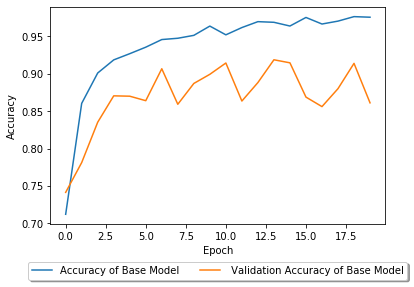

In [14]:
# Graph the results of this model
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding Dropout to reduce Overfitting

In [15]:
# Dropout was used to reduce overfitting
from keras.layers import Dropout

In [16]:
# define a new model that includes dropout for each layer. This should reduce the overfitting in the model
model4 = Sequential()

In [17]:
model4.add(Dense(512, activation = 'relu',input_shape=(784,)))
model4.add(Dropout(0.2))
# Layer 2
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 3
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 4
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
#Output Layer
model4.add(Dense(10, activation = 'softmax'))

In [18]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

In [20]:
NoOverFit = model4.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 7s 546us/step - loss: 1.0514 - accuracy: 0.6351 - val_loss: 1.0085 - val_accuracy: 0.6520
Epoch 2/20
12660/12660 [==============================] - 6s 502us/step - loss: 0.5345 - accuracy: 0.8012 - val_loss: 0.6610 - val_accuracy: 0.7257
Epoch 3/20
12660/12660 [==============================] - 6s 486us/step - loss: 0.3995 - accuracy: 0.8454 - val_loss: 0.6219 - val_accuracy: 0.7784
Epoch 4/20
12660/12660 [==============================] - 6s 476us/step - loss: 0.3572 - accuracy: 0.8721 - val_loss: 0.4481 - val_accuracy: 0.8537
Epoch 5/20
12660/12660 [==============================] - 6s 473us/step - loss: 0.3169 - accuracy: 0.8839 - val_loss: 0.3408 - val_accuracy: 0.8911
Epoch 6/20
12660/12660 [==============================] - 6s 457us/step - loss: 0.2979 - accuracy: 0.8934 - val_loss: 0.4175 - val_accuracy: 0.8770
Epoch 7/20
12660/12660 [==============================] - 6s 45

In [36]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model4.evaluate(brightx_test, y_test) 

4170/4170 [==============================] - 0s 112us/step


In [37]:
score

[0.34548609902104027, 0.8952038288116455]

Text(0, 0.5, 'Accuracy')

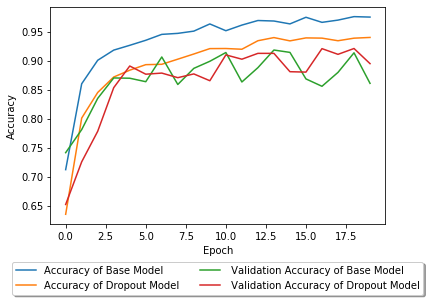

In [21]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(NoOverFit.history['accuracy'], label='Accuracy of Dropout Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(NoOverFit.history['val_accuracy'], label=' Validation Accuracy of Dropout Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [22]:
# This prediction is computed using the Base model. It was expected that it's predictions would be worse given that the dataset is so different to the test set
prediction1 = model2.predict_classes(brightx_test, batch_size=10)

In [23]:
# This prediction was made using the Dropout model and so should be better as there should be less over-fitting
prediction2 = model4.predict_classes(brightx_test, batch_size=10)

In [24]:
rounded_labels=np.argmax(y_test, axis=1)

In [25]:
# Confusion matrices relating to each model's predictions, used to create heat maps, classification report and ROC curves
cm = confusion_matrix(rounded_labels, prediction1)

In [26]:
cm1 = confusion_matrix(rounded_labels, prediction2)

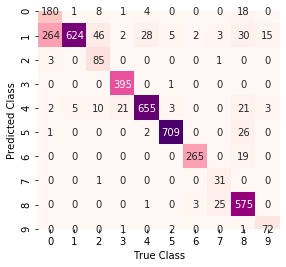

In [27]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

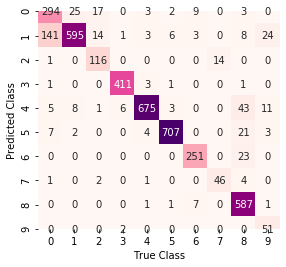

In [28]:
sns.heatmap(cm1.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [29]:
# Classifcation report for the base model's performance on the Day dataset
print(classification_report(rounded_labels,prediction1))

              precision    recall  f1-score   support

           0       0.85      0.40      0.54       450
           1       0.61      0.99      0.76       630
           2       0.96      0.57      0.71       150
           3       1.00      0.94      0.97       420
           4       0.91      0.95      0.93       690
           5       0.96      0.98      0.97       720
           6       0.93      0.98      0.96       270
           7       0.97      0.52      0.67        60
           8       0.95      0.83      0.89       690
           9       0.95      0.80      0.87        90

    accuracy                           0.86      4170
   macro avg       0.91      0.80      0.83      4170
weighted avg       0.89      0.86      0.86      4170



In [30]:
# Classification report for teh Dropout model's performance on the Day dataset
print(classification_report(rounded_labels,prediction2))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       450
           1       0.75      0.94      0.84       630
           2       0.89      0.77      0.83       150
           3       0.99      0.98      0.98       420
           4       0.90      0.98      0.94       690
           5       0.95      0.98      0.97       720
           6       0.92      0.93      0.92       270
           7       0.85      0.77      0.81        60
           8       0.98      0.85      0.91       690
           9       0.96      0.57      0.71        90

    accuracy                           0.90      4170
   macro avg       0.90      0.84      0.86      4170
weighted avg       0.90      0.90      0.89      4170



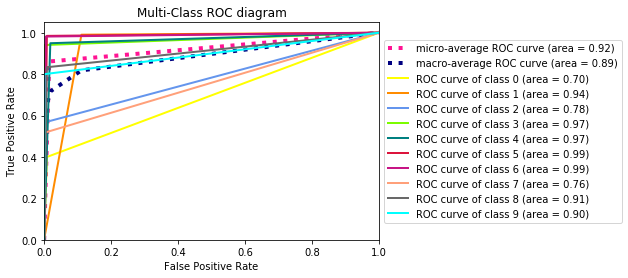

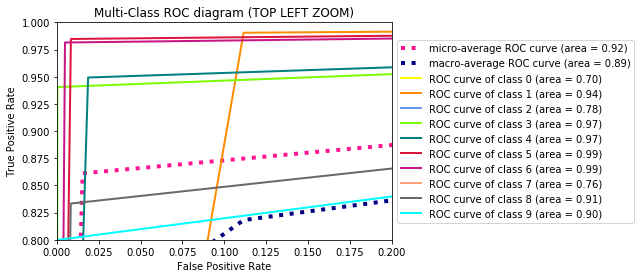

In [31]:
# plot ROC the curve for the Base model
roc.plotROC(y_test,prediction1)

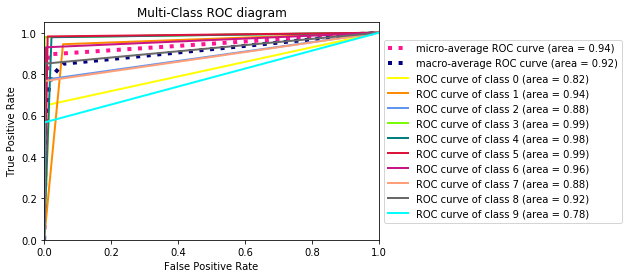

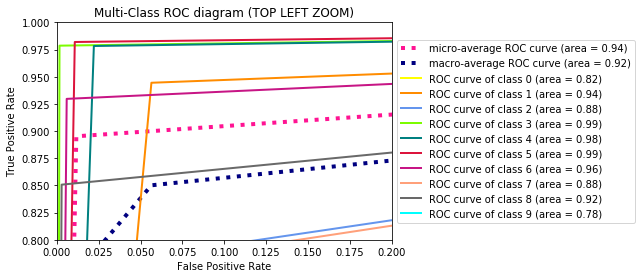

In [32]:
# plot ROC the curve for the dropout model
roc.plotROC(y_test,prediction2)